
<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1995 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html). This open Jupyter notebook acts as a generalized template from which to explore this data.

> **Acknowledgement:** I thank [Ian Allison](https://github.com/ianabc) and [James Colliander](http://colliand.com) of the [Pacific Institute for the Mathematical Sciences](http://www.pims.math.ca/) for building the [JupyterHub service](http://syzygy.ca) and for help with this notebook. -- I. Heisz

In [31]:
## Note: this file is meant primarily as a template from which to create other files, 
## loading this much data puts undue stress on the kernel and may cause it to crash.

## Loading the Data

In [24]:
import numpy as np
import pandas as pd
import sys

df = pd.DataFrame()

startYear = 1995
endYear   = 2017  # The last year is not included, so if it was 2017 it means we include the 2016 collection but not 2017.

for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, 
                               compression='gzip', 
                               usecols = [1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 17, 28], 
                               encoding='latin-1'
                              )
                  )  
    print(year)
 
## Rename columns for better readability.
df.columns = ['Name', 'Department', 'OrganizationID',
                 'Institution', 'ProvinceEN', 'CountryEN',
                 'FiscalYear', 'AwardAmount', 'ProgramID',
                 'ProgramNameEN', 'Committee', 'ResearchSubjectEN']

## Strip out any leading or trailing whitespace in the ProgramID column
df['ProgramID'] = df['ProgramID'].str.strip();

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [25]:
## Quantify data stored in memory.
print("DataFrame: {:4.2f} Mb".format(sys.getsizeof(df) / (1024. * 1024)))

DataFrame: 283.63 Mb


## Selecting the Data that You Want to Use

In [26]:
## run this cell again if you want to reset your selections.
selectedData = df

# This is so you can make a second selection and compare your two selections.
selectedComparisonData = df 

In [46]:
selectedData

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
140,"Adem, Alejandro",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,40000,RGPIN,Discovery Grants Program - Individual,1508,Algebraic topology
569,"Angel, Omer",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,24000,RGPIN,Discovery Grants Program - Individual,1508,Probability theory
7093,"Fraser, Ailana",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,24000,RGPIN,Discovery Grants Program - Individual,1508,Differential geometry
7203,"Froese, Richard",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,20000,RGPIN,Discovery Grants Program - Individual,1508,Functional analysis and operator theory
7693,"Ghoussoub, Nassif",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,44000,RGPIN,Discovery Grants Program - Individual,1508,Linear and non-linear systems
7973,"Gordon, Julia",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,20000,RGPIN,Discovery Grants Program - Individual,1508,Algebra
13148,"Loeppky, Jason","Okanagan - Mathematics, Statistics and Physics...",2,University of British Columbia,British Columbia,CANADA,2010,12000,RGPIN,Discovery Grants Program - Individual,1508,Applied statistics
16760,"Peirce, Anthony",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,10089,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Applied mathematics
16761,"Peirce, Anthony",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,15000,RGPIN,Discovery Grants Program - Individual,1508,Applied mathematics
20037,"Smith, Jeffrey",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,24000,RGPIN,Discovery Grants Program - Individual,1508,Algebraic topology


Note: If you want to use an entire column of data rather than selecting for certain slices of it,
then please comment out all of the selection code for that column, found below. Or simply do not their cells.

### Useful Selection Methods

In [27]:
## View the Available selection inputs for the column you are interested in. 
def viewAvailable(column):
    available = df.drop_duplicates(subset = column)
    sorted = available.sort_values(by=[column], ascending=[True])
    print(sorted.to_string(columns= [column], index=False))
    return;

## Same as view available but with an additional explanatory column for human readable column values.
def viewAvailableEN(column, columnEN):
    available = df.drop_duplicates(subset = column)
    sorted = available.sort_values(by=[column], ascending=[True])
    print(sorted.to_string(columns= [column, columnEN], index=False))
    return;

## Same as view available but with an additional parameter so you can narrown down to results that contain a specific string.
def viewAvailableSearch(column, searchString):
    available = df.drop_duplicates(subset = column)
    available = available[available[column].str.contains(searchString, na=False)]
    sorted = available.sort_values(by=[column], ascending=[True])
    print(sorted.to_string(columns= [column], index=False))
    return;

### Committee Selection

In [28]:
viewAvailableEN('Committee', 'ResearchSubjectEN')

## Get the data for the selected committee
committee = 1508 # Enter your committee selection here
selectedData = selectedData.loc[(selectedData['Committee'] == committee)]

Committee                                  ResearchSubjectEN
        2                                           Genetics
        3                           Agricultural engineering
        4                              Polymers and coatings
        6                               Structural materials
        7                           Software and development
        8         Petrology, igneous and metamorphic geology
        9                                    Stable isotopes
       11                                   Electromagnetics
       12                              Biomedical technology
       13                               Offshore engineering
       14                            Nonparametric inference
       16                                      Combinatorics
       17                         Astronomy and astrophysics
       18                                Terrestrial ecology
       19                                      Not available
       20               

In [29]:
## If you want a different selection for comparison
committee = 1508 # Enter your committee selection here
selectedComparisonData = selectedComparisonData.loc[(selectedComparisonData['Committee'] == committee)]

### Institution Selection

In [30]:
viewAvailableEN('OrganizationID', 'Institution')

## Get the data for the chosen institution
institution = 2 # Enter your OrganizationID here
selectedData = selectedData.loc[(selectedData['OrganizationID'] == institution)]

OrganizationID                                        Institution
             1                                      Not Indicated
             2                     University of British Columbia
             3            University of Northern British Columbia
             4                             Royal Roads University
             5                            Simon Fraser University
             6                         Trinity Western University
             7                             University of Victoria
             8                                             TRIUMF
             9                              University of Alberta
            10           Southern Alberta Institute of Technology
            11                              University of Calgary
            12                           University of Lethbridge
            15                               Athabasca University
            16                         University of Saskatchewan
          

In [51]:
## If you want a different selection for comparison
institution = 31 # Enter your institution selection here
selectedComparisonData = selectedComparisonData.loc[(selectedComparisonData['OrganizationID'] == institution)]

## Program Selection

In [31]:
viewAvailableEN('ProgramID','ProgramNameEN')

## Get the data for the chosen program
#programID = 'CUSRA' # Enter your programID selection here (Use the ProgramID, not the ProgramNameEN)
#selectedData = selectedData.loc[(selectedData['ProgramID'] == programID)]

ProgramID                                      ProgramNameEN
   AAFPJ  Agriculture and Agri-Food Canada Research Part...
   AANSE  Aboriginal Ambassadors in the Natural Sciences...
   APCPJ  Automotive Partnership Canada Project         ...
   BCPIR  Brockhouse Canada Prize for Interdisciplinary ...
   BEFTR                     Bilateral Exchange Program (H)
   BFAOR  Belmont Forum Arctic Observing and Research   ...
   BNCEG  Business-led Networks of Centres of Excellence...
   BNCEL  Business-led Networks of Centres of Excellence...
    BPDF                   Banting Postdoctoral Fellowships
   BPDFT  Banting Postdoctoral Fellowships Tri-council  ...
   CAPPJ                             Cooperative Activities
   CARD1  Applied Research and Development Grants - Level 1
   CARD2  Applied Research and Development Grants - Level 2
   CARD3  Applied Research and Development Grants - Level 3
   CARTI      Applied Research Tools and Instruments Grants
     CCI     College and Community Inno

In [9]:
## If you want a different selection for comparison
#programID = 'CUSRA' # Enter your programID selection here (Use the ProgramID, not the ProgramNameEN)
#selectedComparisonData = selectedComparisonData.loc[(selectedComparisonData['ProgramID'] == programID)]

## Researcher Selection

In [39]:
viewAvailableSearch('Name','Jam') # Normal viewAvailable() would exceed the IO datapub rate.

## Modifiable variable, enter the name of the researcher you are interested in
name = 'Adem, Alejandro' # Enter your name selection here

## Get the data for the chosen researcher
selectedData = selectedData.loc[(selectedData['Name'] == name)]

Name
                        AbdAli, Jamal
                     Ahmed, IramJamil
                        Aitken, Jamie
                    AlAidroos, Jameel
                     Alexander, James
AlexanderJamesFernandes, AlexanderJam
                         Alford, Jamu
                         Allin, James
                       Amyoony, Jamal
                      Anderson, James
         Anderson, JamesStewartMurray
                        Andrew, James
                       Andrews, James
                   Andrews, JamesPaul
                     Andruchow, James
                        Anglin, James
                        Anstey, James
                     Archibald, James
                      Armitage, James
                        Arthur, James
                      Ashigh, Jamshid
                       Atwater, James
                        Austin, James
                 Austin, JamesDouglas
                          Babb, James
                      Babineau, James
       

In [49]:
viewAvailableSearch('ProgramNameEN','Data')

ProgramNameEN
Discovery Frontiers - Advancing Big Data Scien...
Discovery Frontiers - Digging into Data       ...


In [40]:
## If you want a different selection for comparison
name = 'Adem, Alejandro' # Enter your name selection here
selectedComparisonData = selectedComparisonData.loc[(selectedComparisonData['Name'] == name)]

## Selection Based on Subject

In [40]:
# The subject you are interested in keep in mind some departments will have French names
subject = 'Math'

# Select all Department which contain the subject word
selectedData = selectedData[selectedData['Department'].str.contains(subject, na=False)]

# Add in all ResearchSubjectEN which contain the subject word, ignoring duplicate rows
selectedData = selectedData.append(selectedData[selectedData['ResearchSubjectEN'].str.contains(subject, na=False)])
selectedData = selectedData.drop_duplicates()

In [53]:
# The subject you are interested in, keep in mind some departments will have French names
subject = 'Math'

# Select all Department which contain the subject word
selectedComparisonData = selectedComparisonData[selectedComparisonData['Department'].str.contains(subject, na=False)]

# Add in all ResearchSubjectEN which contain the subject word, ignoring duplicate rows
selectedComparisonData = selectedComparisonData.append(selectedComparisonData[selectedComparisonData['ResearchSubjectEN'].str.contains(subject, na=False)])
selectedComparisonData = selectedComparisonData.drop_duplicates()

## Selection Based on Threshold
This only works for numerical data, please do not use it on categorical columns of data.

In [14]:
# numerical column you want to create a threshold for
numericalColumn = 'AwardAmount'

# Set the numerical threshold to select for certain values
threshold = '30000'

# Comparator. Options are: 
# '>'      for numericalColumn > threshold
# '<'      for numericalColumn < threshold
# '='      for numericalColumn = threshold
comparator = '>'

# Set the data to your selection
selectedData = selectedData.query(numericalColumn + comparator + threshold)

In [15]:
## If you want a different selection for comparison
numericalColumn = 'AwardAmount'
threshold = '10000'
comparator = '>'
selectedComparisonData = selectedComparisonData.query(numericalColumn + comparator + threshold)

## Does not Contain Subject

In [116]:
# The subject you are interested in keep in mind some departments will have French names
subject = 'Math'

# Select all Department which contain the subject word
selectedData = selectedData[selectedData['Department'].str.contains(subject)==False]

### A sample of the data selected
If this is empty then try being less selective.

In [117]:
selectedData.head()

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
5722,"Doebeli, Michael",Zoology,2,University of British Columbia,British Columbia,CANADA,2009,48530,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Applied mathematics
24129,"Yu, Hao",Statistical and Actuarial Sciences,36,University of Western Ontario,Ontario,CANADA,2009,25341,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Statistical theory
1629,"BenAbdallah, Ramzi",Finance (École des sciences de la gestion),57,Université du Québec à Montréal,Québec,CANADA,2010,12000,RGPIN,Discovery Grants Program - Individual,1508,Civil engineering
2879,"Buono, PietroLuciano","Science, Faculty of",19222,University of Ontario Institute of Technology,Ontario,CANADA,2010,12000,RGPIN,Discovery Grants Program - Individual,1508,Linear and non-linear systems
4315,"Cook, Richard",Statistics and Actuarial Science,33,University of Waterloo,Ontario,CANADA,2010,40000,RGPIN,Discovery Grants Program - Individual,1508,Biostatistics


In [55]:
selectedComparisonData.head() 

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
127,"Akcoglu, Mustafa",Mathematics,31,University of Toronto,Ontario,CANADA,1995,15800,RGPIN,Discovery Grants Program - Individual,336,Classical analysis
147,"Albanese, Claudio",Mathematics,31,University of Toronto,Ontario,CANADA,1995,14000,RGPIN,Discovery Grants Program - Individual,337,Mathematical physics
301,"Andress, Christine",Mathematics,31,University of Toronto,Ontario,CANADA,1995,10380,PGS,Postgraduate Scholarships,148,Pure mathematics
411,"Arthur, James",Mathematics,31,University of Toronto,Ontario,CANADA,1995,51200,RGPIN,Discovery Grants Program - Individual,336,Lie theory
492,"Austin, Peter",Mathematics,31,University of Toronto,Ontario,CANADA,1995,5822,PGS,Postgraduate Scholarships,148,Pure mathematics


### Information About the Selected Data

In [56]:
def overview(column, data):
    mean = data[columnYouWantInformationOn].mean()
    print('The mean of ' + str(columnYouWantInformationOn) + ' is ' + str(mean))

    median = data[columnYouWantInformationOn].median()
    print('The median of ' + str(columnYouWantInformationOn) + ' is ' + str(median))

    standardDeviation = data[columnYouWantInformationOn].std()
    print('The standard deviation of ' + str(columnYouWantInformationOn) + ' is ' + str(standardDeviation))

    awardCount = data.AwardAmount.count()
    print('The total number of awards for your selection is ' + str(awardCount))
    return;

In [57]:
columnYouWantInformationOn = 'AwardAmount'
overview(columnYouWantInformationOn, selectedData)

The mean of AwardAmount is 40727.631917
The median of AwardAmount is 20000.0
The standard deviation of AwardAmount is 107233.299846
The total number of awards for your selection is 2024


In [58]:
overview('AwardAmount', selectedComparisonData)

The mean of AwardAmount is 35217.7621895
The median of AwardAmount is 20000.0
The standard deviation of AwardAmount is 107689.976911
The total number of awards for your selection is 2174


## Plotting

In [21]:
## Imports For Plotting
import matplotlib.ticker as mtick
import plotly.graph_objs as go
!pip3 install plotly --user #Plotly for interactive graphing
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.tools as tls
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

Note: There is a weird bug in plotly https://community.plot.ly/t/offline-mode-in-jupyter-notebook-shows-blank-graphs/1860/24
And sometimes the plotly graphs will be blank, refreshing fixes this sometimes. 
I have been noticing this happening with mathbox as well so I suspect it is a jupyter issue not only a plotly issue. 

### Plot Settings, Modifiable Variables

In [22]:
# Make the title more suited to what you select
title = 'Graph of NSERC Funding'

plotPointSizes = 7 

## Change the opacity fo the scatter plot points. 
# low values allow you to easily see points that are layered on top of each other 
# but may make individual values difficult to see.
opacity = 1

### The Plot Methods

In [41]:
## A simple plot of awards over time
def nsercPlot (data):
    fig, axes = plt.subplots()  # better than plt.gca() or fig.gca()

    xAxis = 'FiscalYear'
    yAxis = 'AwardAmount'
    
    y = data.groupby(xAxis).sum()[yAxis]
    x = y.index
    
    plt.xlabel(xAxis, fontsize=14)
    plt.ylabel(yAxis, fontsize=14)
    plt.title(title)
    
    ### Only uncomment these and the scaling if plot.ly is not working
    #plt.xlabel(xAxis + xScalingFactorString, fontsize=14)
    #plt.ylabel(yAxis + yScalingFactorString, fontsize=14)
    
    ## y axis scaling
    #yScalingFactor = 10**3
    #yScalingFactorString = ' In Thousands'
    #y = y/yScalingFactor
    
    plt.plot(x,y)
    
    ## Make an interactive graph of the points with plotly
    init_notebook_mode(connected=True)
    
    #fig = plt.Figure()
    #axes = fig.gca()
    axes.scatter(x,y,s=plotPointSizes,alpha=opacity)
    canvas = FigureCanvas(fig)
    plotly_fig = tls.mpl_to_plotly(fig)
    py.iplot(plotly_fig)
    
    return;

In [59]:
## A plot showing the awards for non numeric axes.
# interestedIn needs to be an element of the nonNumericAxis and helps you to identify a specific item in the graph
def jupyterNonNumericXPlot (data, nonNumericAxis, interestedIn):
    numericAxis = 'AwardAmount'
    
    ## Create a dataframe
    lollipopData = pd.DataFrame({'nonNumericAxis':data[nonNumericAxis], 'numericAxis':data[numericAxis]})
    sortedLollipopData = lollipopData.sort_values(by='numericAxis')
    
    y = range(sortedLollipopData.shape[0])

    ## Highlight a specific name or group of names
    colour=np.where(sortedLollipopData['nonNumericAxis']==interestedIn, 'orange', 'skyblue')
    size=np.where(sortedLollipopData['nonNumericAxis']==interestedIn, 70, 30)

    ## The vertical plot is made using the hline function
    import seaborn as sns # Just so it looks good
    plt.hlines(y, xmin=0, xmax=sortedLollipopData['numericAxis'], color=colour, alpha=0.4)
    plt.scatter(sortedLollipopData['numericAxis'], y, color=colour, s=size, alpha=1) # Add the highlighted points

    ## Add title and axis names
    plt.yticks(y, sortedLollipopData['numericAxis'])
    plt.title(title, loc='left')
    
    # y labels
    yticks = data.Name
    plt.yticks(y,yticks)
    plt.ylabel(nonNumericAxis)
    
    plt.xlabel(numericAxis + ' in $')
    
    return;

In [99]:
## A plot showing the awards for non numeric axes.
# interestedIn needs to be an element of the nonNumericAxis and helps you to identify a specific item in the graph
def jupyterNonNumericXOverYearsPlot (data, nonNumericAxis, interestedIn):
    numericAxis = 'FiscalYear'
    
    ## Create a dataframe
    lollipopData = pd.DataFrame({'nonNumericAxis':data[nonNumericAxis], 'numericAxis':data[numericAxis]})
    sortedLollipopData = lollipopData.sort_values(by='numericAxis')
    
    y = range(sortedLollipopData.shape[0])

    ## Highlight a specific name or group of names
    colour=np.where(sortedLollipopData['nonNumericAxis']==interestedIn, 'orange', 'skyblue')
    size=np.where(sortedLollipopData['nonNumericAxis']==interestedIn, 70, 30)

    ## The vertical plot is made using the hline function
    import seaborn as sns # Just so it looks good
    plt.hlines(y, xmin=0, xmax=sortedLollipopData['numericAxis'], color=colour, alpha=0.4)
    plt.scatter(sortedLollipopData['numericAxis'], y, color=colour, s=size, alpha=1) # Add the highlighted points

    ## Add title and axis names
    plt.yticks(y, sortedLollipopData['numericAxis'])
    plt.title(title, loc='left')
    
    
    # y labels
    yticks = data.Name
    plt.yticks(y,yticks)
    plt.ylabel(nonNumericAxis)
    
    plt.xlabel(numericAxis + ' in $')
    
    axes = plt.gca()
    axes.set_xlim([startYear,endYear])
    return;

In [60]:
## simple plot that allows you to compare the awards from two data selections, over time.
def jupyterComparisonPlot(data0, data1):
    fig, axes = plt.subplots()  # better than plt.gca() or fig.gca()

    xAxis = 'FiscalYear'
    yAxis = 'AwardAmount'
    
    yScalingFactor = 10**3
    yScalingFactorString = ' In Thousands'
    
    ## Bad spaghetti plot, it is only comparing two though so it's okay
    y0 = data0.groupby(xAxis).sum()[yAxis]
    y0 = y0/yScalingFactor
    y1 = data1.groupby(xAxis).sum()[yAxis]
    y1 = y1/yScalingFactor
    plt.ylabel(yAxis + yScalingFactorString, fontsize=14)
    
    x0 = y0.index
    x1 = y1.index
    plt.xlabel(xAxis, fontsize=16)

    plt.title(title)

    plt.plot(x0, y0)
    plt.plot(x1, y1)
    return;

## Makes the plot

In [61]:
nsercPlot(selectedData)

## An Example of How You Can Make a Second Plot with Different Axes

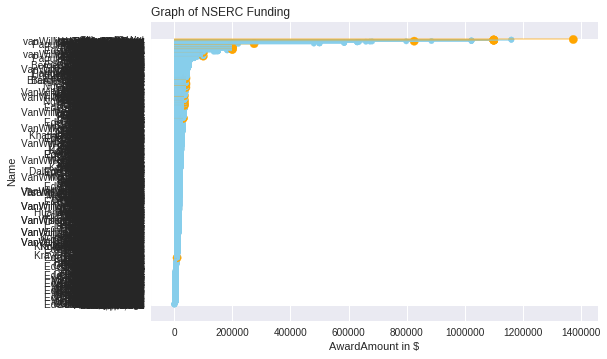

In [62]:
nonNumericAxis = 'Name' # Change whatever variable you want to be different from the first plot
interestedIn = 'Adem, Alejandro' # Should be a value in the nonNumericAxis
jupyterNonNumericXPlot(selectedData, nonNumericAxis, interestedIn)

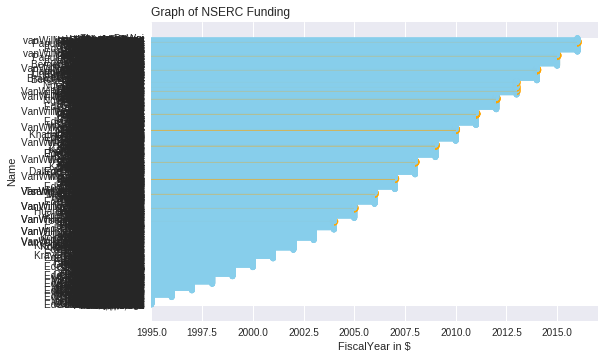

In [98]:
jupyterNonNumericXOverYearsPlot (selectedData, nonNumericAxis, interestedIn)

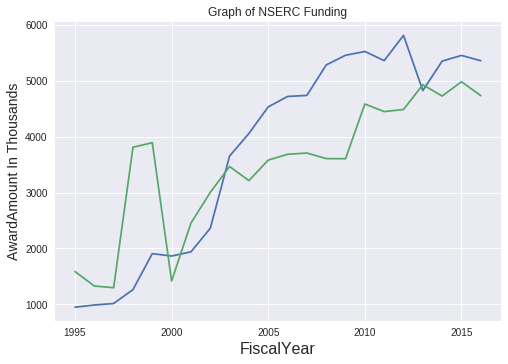

In [63]:
jupyterComparisonPlot(selectedData, selectedComparisonData)

TO DO

**Figure out why plot.ly is so unstable (it's looking like it's because of cache invalidation, uh-oh)

I am suspicious of the groupby sum, not certain it is behaving as expected.

Don't use the bad spaghetti plot https://python-graph-gallery.com/125-small-multiples-for-line-chart/

jupyterNonNumericXOverYearsPlot<br>
Not very useful and bad name, modify it.<br>
Make the xtick interval on the non numeric year plot nicer.

Make something that removes from the selection, basically a "deselect" method for each of these so you can ex. remove specific institutions, programs, etc. from your current selection. Just use .drop()

## Variable Inspector Widget

In [89]:
import ipywidgets as widgets # Loads the Widget framework.
from IPython.core.magics.namespace import NamespaceMagics # Used to query namespace.

# For this example, hide these names, just to avoid polluting the namespace further
get_ipython().user_ns_hidden['widgets'] = widgets
get_ipython().user_ns_hidden['NamespaceMagics'] = NamespaceMagics

In [90]:
class VariableInspectorWindow(object):
    instance = None

    def __init__(self, ipython):
        """Public constructor."""
        if VariableInspectorWindow.instance is not None:
            raise Exception("""Only one instance of the Variable Inspector can exist at a
                time.  Call close() on the active instance before creating a new instance.
                If you have lost the handle to the active instance, you can re-obtain it
                via `VariableInspectorWindow.instance`.""")

        VariableInspectorWindow.instance = self
        self.closed = False
        self.namespace = NamespaceMagics()
        self.namespace.shell = ipython.kernel.shell

        self._box = widgets.Box()
        self._box.layout.overflow_y = 'scroll'
        self._table = widgets.HTML(value = 'Not hooked')
        self._box.children = [self._table]

        self._ipython = ipython
        self._ipython.events.register('post_run_cell', self._fill)

    def close(self):
        """Close and remove hooks."""
        if not self.closed:
            self._ipython.events.unregister('post_run_cell', self._fill)
            self._box.close()
            self.closed = True
            VariableInspectorWindow.instance = None

    def _fill(self):
        """Fill self with variable information."""
        values = self.namespace.who_ls()
        self._table.value = '<div class="rendered_html jp-RenderedHTMLCommon"><table><thead><tr><th>Name</th><th>Type</th><th>Value</th></tr></thead><tr><td>' + \
            '</td></tr><tr><td>'.join(['{0}</td><td>{1}</td><td>{2}'.format(v, type(eval(v)).__name__, str(eval(v))) for v in values]) + \
            '</td></tr></table></div>'

    def _ipython_display_(self):
        """Called when display() or pyout is used to display the Variable
        Inspector."""
        self._box._ipython_display_()


In [91]:
#inspector = VariableInspectorWindow(get_ipython())
#inspector